# **Credit Limit** Prediction Using Deep Neural Networks

## Authors
- **Kianoosh Vadaei**: Researcher
- **Melika Shirian**: Researcher

### Contact Information
- Kianoosh Vadaei: [email](mailto:kia.vadaei@gmail.com), [LinkedIn](https://www.linkedin.com/in/kianoosh-vadaei-0aa58611b/), [GitHub](https://github.com/kia-vadaei)
- Melika Shirian: [email](mel.shirian@gmail.com), [LinkedIn](https://www.linkedin.com/in/melika-shirian-b8477a254/), [GitHub](https://github.com/MelikaShirian12)


## Introduction
This notebook provides an analysis of **Credit Limit** Prediction. We will cover the following steps:
1. Data Loading
2. Data Preprocessing
3. Exploratory Data Analysis
4. Model Building
5. Model Evaluation
6. Conclusion

## Table of Contents
1. [Introduction](#Introduction)
2. [Data Loading](#Data-Loading)
3. [Data Preprocessing](#Data-Preprocessing)
4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
5. [Model Building](#Model-Building)
6. [Model Evaluation](#Model-Evaluation)
7. [Conclusion](#Conclusion)



In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import *
from dataset import Dataset
from models import OneLayerModel, TwoLayerModel, ClassicModels

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'The device is: {device}')

The device is: cuda


<a id='Data-Loading'></a>
## **Data Loading**
In this section, we will load the dataset and display the first few rows to understand its structure.


In [3]:
dataset = Dataset(data_path='../data/CreditPrediction.csv', target_col='Credit_Limit')
dataset.load_data()

print(f'The dataset is shown below:')
display(dataset.data_df)

The dataset is shown below:


,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Unnamed: 19
0,768805383,45.0,M,3,High School,Married,$60K - $80K,Blue,39.0,5.0,1,3,12691.0,777,1.335,1144,42,1.625,0.061,NaN
1,818770008,49.0,F,5,Graduate,NaN,Less than $40K,Blue,44.0,6.0,1,2,8256.0,864,1.541,1291,33,3.714,0.105,NaN
2,713982108,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36.0,4.0,1,0,3418.0,0,2.594,1887,20,2.333,0.000,NaN
3,769911858,40.0,F,4,High School,NaN,Less than $40K,Blue,34.0,3.0,4,1,3313.0,2517,1.405,1171,20,2.333,0.760,NaN
4,709106358,40.0,M,3,Uneducated,Married,$60K - $80K,NaN,21.0,5.0,1,0,4716.0,0,2.175,816,28,2.500,0.000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10162,718673358,35.0,M,3,Doctorate,NaN,$80K - $120K,Blue,30.0,5.0,3,4,13590.0,1528,0.728,2137,52,0.486,0.112,NaN
10163,715207458,46.0,F,1,Unknown,Single,Less than $40K,Blue,39.0,2.0,2,1,2029.0,1074,0.514,4802,90,0.800,0.529,NaN
10164,803665983,52.0,M,0,Unknown,NaN,$60K - $80K,Blue,46.0,3.0,2,4,2742.0,2184,0.592,3829,72,0.532,0.796,NaN
10165,713183508,39.0,F,1,High School,NaN,Unknown,NaN,36.0,1.0,3,2,2751.0,1158,0.821,4861,82,0.822,0.421,NaN


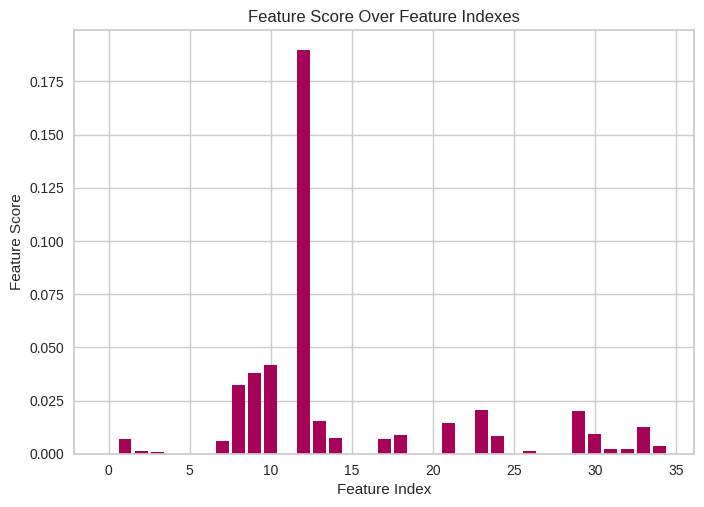

In [4]:
dataset.preprocess_data(features_score_plot=True, random_state=112, pca=False,)

In [5]:
# for i in range(dataset.X_train.shape[1]):
#     plt.figure()
#     plt.boxplot(dataset.X_train[i], vert=False)
#     plt.title("Boxplot of the sample after treating the outliers")

# plt.boxplot(dataset.data_df['Credit_Limit'], vert=False)
# dataset.data_df['Credit_Limit'].describe()
# # dataset.target.describe()
# # dataset.target.describe()
# dataset.X_train[10].describe()

# dataset.data_df['Credit_Limit']

## **Model Building**

In [6]:
dataset.prepare_for_model()
dataset.to_device(device)

In [7]:
nn_model = TwoLayerModel(dataset.num_features , 16, device=device)
nn_model = nn_model.to(device)

100%|██████████| 30000/30000 [00:33<00:00, 895.34it/s]


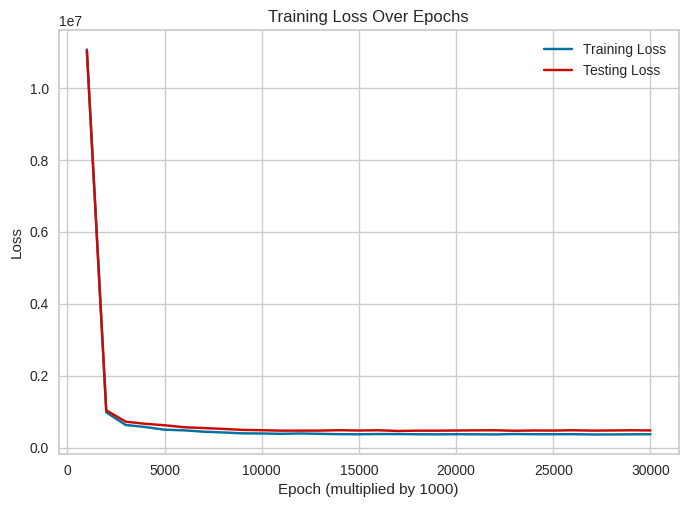

In [8]:
nn_model.fit(dataset.X_train, dataset.target_train, dataset.X_test, dataset.target_test, show_plot=True)

In [9]:
nn_model.test_report(dataset.X_test, dataset.target_test)

,Model,MSE,MAE,RMSE,R2,TT (Sec)
0,TwoLayerModel,485218.59375,603.708618,696.576337,-4.484429,33.61925


In [10]:
X = torch.vstack((dataset.X_train, dataset.X_test))
y = torch.vstack((dataset.target_train, dataset.target_test))

classic_models = ClassicModels()
classic_models.classical_report(X, y)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Regression
3,Original data shape,"(2025, 20)"
4,Transformed data shape,"(2025, 20)"
5,Transformed train set shape,"(1417, 20)"
6,Transformed test set shape,"(608, 20)"
7,Numeric features,19
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,532.4355,385192.6444,620.2038,0.1505,0.1351,0.1177,0.0350
ada,AdaBoost Regressor,540.1883,385251.1567,620.4361,0.1504,0.1352,0.1194,0.0080
rf,Random Forest Regressor,537.3451,401360.9119,632.6512,0.1160,0.1378,0.1187,0.0900
et,Extra Trees Regressor,532.2245,403274.8789,634.5228,0.1110,0.1382,0.1178,0.0570
br,Bayesian Ridge,580.7611,426460.2906,652.7429,0.0608,0.1423,0.1285,0.0060
lr,Linear Regression,577.5729,426741.5844,652.9368,0.0601,0.1422,0.1278,0.2760
lasso,Lasso Regression,578.1000,426769.8469,652.9653,0.0600,0.1422,0.1279,0.1470
ridge,Ridge Regression,577.8416,426939.2500,653.0936,0.0597,0.1423,0.1278,0.0070
llar,Lasso Least Angle Regression,578.2764,426936.0719,653.0975,0.0596,0.1423,0.1279,0.0090
lar,Least Angle Regression,577.8049,427276.5531,653.3614,0.0589,0.1423,0.1278,0.0070


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,519.6114,366044.5947,605.0162,0.2010,0.1313,0.1138


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,target,prediction_label
1027,-1.807187,0.516554,2.101848,-0.686793,-0.566978,0.421272,0.861934,-0.861934,-0.346029,0.0,...,-0.248724,-0.386203,-0.240255,-0.641116,-0.408599,-0.746211,0.0,0.0,5512.0,4792.677638
1462,-0.188597,-0.519610,-0.248338,-0.895324,-1.574091,0.240161,0.861934,-0.861934,-0.346029,0.0,...,-0.248724,-0.386203,-0.240255,-0.641116,-0.408599,1.340103,0.0,0.0,5207.0,4896.640653
1708,1.429993,-1.555775,1.590683,-0.528541,0.089836,-0.349743,0.861934,-0.861934,-0.346029,0.0,...,4.020517,-0.386203,-0.240255,-0.641116,-0.408599,1.340103,0.0,0.0,5454.0,4661.791810
1241,0.620698,-0.519610,0.815121,0.971013,-0.041527,-1.017267,0.861934,-0.861934,-0.346029,0.0,...,-0.248724,-0.386203,-0.240255,1.559779,-0.408599,1.340103,0.0,0.0,5512.0,4557.749001
239,0.620698,-0.519610,0.450842,-0.768392,-0.917278,-0.028918,-1.160181,1.160181,-0.346029,0.0,...,-0.248724,-0.386203,-0.240255,-0.641116,2.447384,-0.746211,0.0,0.0,5512.0,5094.286391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,-0.188597,1.552718,1.308660,-0.038947,0.615286,0.141844,0.861934,-0.861934,-0.346029,0.0,...,-0.248724,-0.386203,-0.240255,1.559779,-0.408599,1.340103,0.0,0.0,5353.0,4625.148160
1785,0.620698,-0.519610,-0.982771,-0.173297,0.308773,-1.400187,0.861934,-0.861934,-0.346029,0.0,...,-0.248724,-0.386203,-0.240255,-0.641116,-0.408599,-0.746211,0.0,0.0,4798.0,4656.260833
712,-0.997892,-1.555775,-1.012148,-0.101588,-0.085315,-0.008220,-1.160181,1.160181,-0.346029,0.0,...,-0.248724,2.589314,-0.240255,1.559779,2.447384,-0.746211,0.0,0.0,3773.0,4897.565373
1856,-1.807187,1.552718,-1.141409,-0.643659,-0.742128,0.359177,0.861934,-0.861934,-0.346029,0.0,...,-0.248724,-0.386203,-0.240255,1.559779,-0.408599,1.340103,0.0,0.0,3773.0,4793.319863


In [12]:
dataset.X_train.shape

torch.Size([1356, 19])